# Unsupervised - Models

## K mean algorithms

Consider the unlabeled dataset represented in Figure 9-2: you can clearly see
five blobs of instances. The k-means algorithm is a simple algorithm capable
of clustering this kind of dataset very quickly and efficiently, often in just a
few iterations.

Let's train a K-Means clusterer on a dataset if blobs. It will try to find each blob's center and assign each instance to the closest blob:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
from scipy.cluster.vq import kmeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[0.2,2.3],[-1.5,2.3],[-2.8,1.8], [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X,y = make_blobs(n_samples=2000, cluster_std=blob_std, centers=blob_centers, random_state=7)

k=5
kmeans =KMeans(n_clusters =k ,n_init=100 ,random_state=42)
y_pred = kmeans.fit_predict(X)

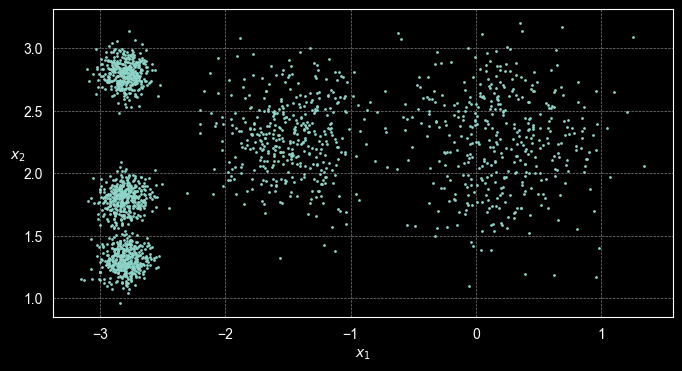

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid(color='grey', linestyle='--', linewidth=.5)

plt.show()

y_pred will return the cluster id in term of number that instance (datapoint ) is assigned to

* 1 point is assigned to cluster (0)
* 2 point is assigned to cluster (0)
* 3 point is assigned to cluster (4)

In [4]:
y_pred

array([0, 4, 1, ..., 3, 1, 4], shape=(2000,), dtype=int32)

In [5]:
y_pred is kmeans.labels_

True

In [6]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

You can easily assign new instances to the cluster whose centroid is closest:

In [7]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)


array([1, 1, 3, 3], dtype=int32)

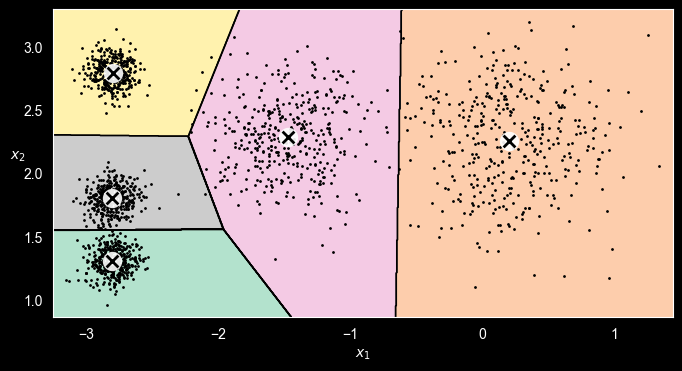

In [8]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

1. Hard Clustering (Strict Assignment)
In hard clustering, every data point belongs to exactly one cluster. It is an "all-or-nothing" approach. There is no ambiguity; a point is either in Group A or it is not.

In soft clustering (also called Fuzzy Clustering), a data point can belong to multiple clusters at the same time, with different degrees of belief (probabilities)

 The score can be the distance between the instance and
the centroid or a similarity score

 In the KMeans class, the transform()
method measures the distance from each instance to every centroid:

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)


array([1, 1, 3, 3], dtype=int32)

In [10]:
kmeans.transform(X_new).round(2)

array([[2.89, 0.33, 1.49, 2.9 , 2.81],
       [5.84, 2.8 , 4.48, 5.85, 5.81],
       [1.71, 3.29, 1.69, 0.29, 1.21],
       [1.22, 3.22, 1.55, 0.36, 0.73]])

In this example, the first instance in X_new is located at a distance of about
2.81 from the first centroid, 0.33 from the second centroid, 2.90 from the
third centroid, 1.49 from the fourth centroid, and 2.89 from the fifth centroid.


### Centroid initialization methods


If you happen to know approximately where the centroids should be (e.g., if
you ran another clustering algorithm earlier), then you can set the init
hyperparameter to a NumPy array containing the list of centroids, and set
n_init to 1:

In [11]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.","array([[-3, ... [ 0, 2]])"
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",1
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


Inertia is a metric that measures how well your data points cluster around their centroids. It essentially tells you how tightly packed your clusters are

Lower value is better: A lower inertia means the data points are very close to their centroids. The clusters are dense and compact.

Higher value is worse: A high inertia means the data points are scattered far away from their centroids. The clusters are loose and "fluffy."

In [12]:
kmeans.inertia_

211.5985372581684

### Accelerated K-Means

### mini batch K means

Mini-Batch K-Means solves this by taking shortcuts: Instead of looking at the entire dataset at once, it grabs small, random chunks of data (called mini-batches) and uses them to nudge the centroids in the right direction.

Scikit-Learn implements this algorithm in
the MiniBatchKMeans class, which you can use just like the KMeans class:

In [13]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

In [14]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [15]:
filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype='float32', mode='write',
                     shape=X_train.shape)
X_memmap[:] = X_train
X_memmap.flush()

In [16]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,
                                   n_init=3, random_state=42)
minibatch_kmeans.fit(X_memmap)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.",10
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:'k-means++' : selects initial cluster centroids using sampling based onan empirical probability distribution of the points' contribution to theoverall inertia. This technique speeds up convergence. The algorithmimplemented is ""greedy k-means++"". It differs from the vanilla k-means++by making several trials at each sampling step and choosing the best centroidamong them.'random': choose `n_clusters` observations (rows) at random from datafor the initial centroids.If an array is passed, it should be of shape (n_clusters, n_features)and gives the initial centers.If a callable is passed, it should take arguments X, n_clusters and arandom state and return an initialization.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"max_iter max_iter: int, default=100Maximum number of iterations over the complete dataset beforestopping independently of any early stopping criterion heuristics.",100
,"batch_size batch_size: int, default=1024Size of the mini batches.For faster computations, you can set `batch_size > 256 * number_of_cores`to enable :ref:`parallelism `on all cores... versionchanged:: 1.0 `batch_size` default changed from 100 to 1024.",10
,"verbose verbose: int, default=0Verbosity mode.",0
,"compute_labels compute_labels: bool, default=TrueCompute label assignment and inertia for the complete datasetonce the minibatch optimization has converged in fit.",True
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization andrandom reassignment. Use an int to make the randomness deterministic.See :term:`Glossary `.",42
,"tol tol: float, default=0.0Control early stopping based on the relative center changes asmeasured by a smoothed, variance-normalized of the mean centersquared position changes. This early stopping heuristics iscloser to the one used for the batch variant of the algorithmsbut induces a slight computational and memory overhead over theinertia heuristic.To disable convergence detection based on normalized centerchange, set tol to 0.0 (default).",0.0
,"max_no_improvement max_no_improvement: int, default=10Control early stopping based on the consecutive number of minibatches that does not yield an improvement on the smoothed inertia.To disable convergence detection based on inertia, setmax_no_improvement to None.",10
,"init_size init_size: int, default=NoneNumber of samples to randomly sample for speeding up theinitialization (sometimes at the expense of accuracy): theonly algorithm is initialized by running a batch KMeans on arandom subset of the data. This needs to be larger than n_clusters.If `None`, the heuristic is `init_size = 3 * batch_size` if`3 * batch_size < n_clusters`, else `init_size = 3 * n_clusters`.",None
,"n_init n_init: 'auto' or int, default=""auto""Number of random initializations that are tried.In contrast to KMeans, the algorithm is only run once, using the best ofthe `n_init` initializations as measured by inertia. Several runs arerecommended for sparse high-dimensional problems (see:ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:3 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'` in version.",3


In [ ]:
from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()

4/100

### Finding the optimal number of clusters

In [ ]:
# extra code – this cell generates and saves Figure 9–5

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

plt.show

lets calculate the inertia for both the diagrams

In [ ]:
kmeans_k3.inertia_

In [ ]:
kmeans_k8.inertia_

No, we cannot simply take the value of
 that minimizes the inertia, since it keeps getting lower as we increase
. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of
 and analyze the resulting curve:

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()

plt.show()

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to (b - a) / max(a, b) where a is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and b is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes b, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid(color="w", linestyle="--")
plt.show()

## Using Clustering for Semi-Supervised Learning


Another use case for clustering is in semi-supervised learning, when we have
plenty of unlabeled instances and very few labeled instances. In this section,
we’ll use the digits dataset, which is a simple MNIST-like dataset containing
1,797 grayscale 8 × 8 images representing the digits 0 to 9. First, let’s load
and split the datase

In [ ]:
from sklearn.datasets import load_digits
X_digits,y_digits = load_digits(return_X_y=True)
X_train,y_train = X_digits[:1400],y_digits[:1400]
X_test,y_test = X_digits[1400:],y_digits[1400:]

We will pretend we only have labels for 50 instances. To get a baseline
performance, let’s train a logistic regression model on these 50 labeled
instances:

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

In [ ]:
log_reg.score(X_test,y_test)

In [ ]:
# extra code – measure the accuracy when we use the whole training set
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

I will continue to train this semi supervised learning algorithm after completion of DBSCAN algo

## DBSCAN

The density-based spatial clustering of applications with noise (DBSCAN)
algorithm defines clusters as continuous regions of high density. Here is how
it works:


* For each instance, the algorithm counts how many instances are located
within a small distance ε (epsilon) from it. This region is called the
instance’s ε-neighborhood.
* If an instance has at least min_samples instances in its ε-neighborhood
(including itself), then it is considered a core instance. In other words,
core instances are those that are located in dense regions.

* All instances in the neighborhood of a core instance belong to the same
cluster. This neighborhood may include other core instances; therefore, a
long sequence of neighboring core instances forms a single cluster.

* Any instance that is not a core instance and does not have one in its
neighborhood is considered an anomaly.

This algorithm works well if all the clusters are well separated by low-density
regions.

let's apply the `DBSCAN` algorithm on the moon data set because in this dataset two cluster are seperated in the s shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, random_state=42,noise=0.05)

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

The labels of all the instances are now available in the labels_ instance
variable

In [ ]:
dbscan.labels_

This is the most important output. It tells you which cluster every data point belongs to

Notice that some instances have a cluster index equal to –1, which means that
they are considered as anomalies by the algorithm.

In [ ]:
dbscan.core_sample_indices_

To understand this, you need to know that DBSCAN defines three types of points:
Core Points: Points in the dense center of a cluster (they have many neighbors).
Border Points: Points on the edge of a cluster.
Noise Points: Points far away from everyone else.
core_sample_indices_ tells you which rows in your original data are "Core Points."
Format: An array of integers representing row numbers (indices).
Example: If the output is [0, 3, 5], it means the data points at row 0, row 3, and row 5 in your dataset X are the dense centers that formed the clusters.

In [ ]:
dbscan.components_

This is simply the actual coordinates of the Core Points mentioned above.
format: A matrix of shape (n_core_samples, n_features).

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)


plt.show()

Surprisingly, the DBSCAN class does not have a predict() method, although
it has a fit_predict() method. In other words, it cannot predict which cluster a
new instance belongs to.

 For example, let’s train a KNeighborsClassifier:

In [ ]:
dbscan = dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)


In [ ]:
knn.predict_proba(X_new)

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()